In [2]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [5]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [6]:
df = pd.read_excel('Platinum_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

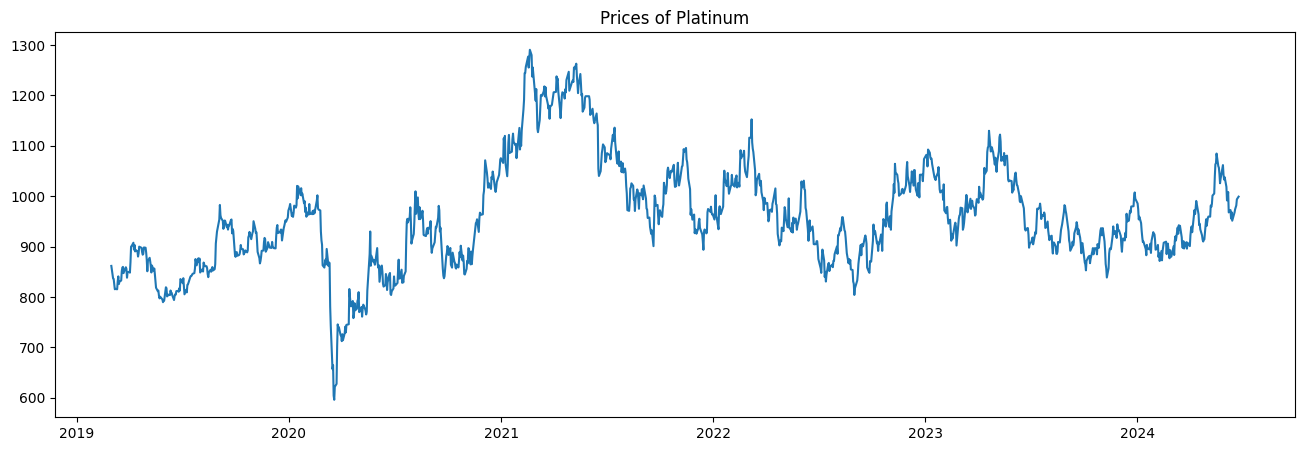

In [7]:
    # Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

    # Format column Price to float




    # Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

    # Plot the 'price' column of the 'df' DataFrame
    plt.figure(figsize=(16,5))
    plt.plot(df1['close'])
    plt.title('Prices of Platinum')
    plt.show()

In [8]:
df

,date,open,high,low,close,volume
2019-03-01,2019-03-01,861.599976,861.599976,861.599976,861.599976,0
2019-03-04,2019-03-04,836.799988,836.799988,836.799988,836.799988,0
2019-03-05,2019-03-05,840.200012,840.200012,835.900024,835.900024,2
2019-03-06,2019-03-06,828.299988,828.400024,826.200012,826.200012,2
2019-03-07,2019-03-07,825.000000,825.000000,815.299988,815.299988,4
...,...,...,...,...,...,...
2024-06-17,2024-06-17,963.200012,967.799988,961.200012,967.799988,8
2024-06-18,2024-06-18,974.099976,974.099976,974.099976,974.099976,8
2024-06-20,2024-06-20,981.599976,981.599976,981.599976,981.599976,8
2024-06-21,2024-06-21,993.700012,993.700012,993.700012,993.700012,8


In [9]:
# Split dataset 

In [10]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [11]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [12]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [13]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.23039, saving model to save_model_7_2_1.keras
17/17 - 3s - 188ms/step - loss: 0.2304
Epoch 2/80

Epoch 2: loss improved from 0.23039 to 0.07323, saving model to save_model_7_2_1.keras
17/17 - 1s - 43ms/step - loss: 0.0732
Epoch 3/80

Epoch 3: loss improved from 0.07323 to 0.06202, saving model to save_model_7_2_1.keras
17/17 - 1s - 42ms/step - loss: 0.0620
Epoch 4/80

Epoch 4: loss improved from 0.06202 to 0.05658, saving model to save_model_7_2_1.keras
17/17 - 1s - 43ms/step - loss: 0.0566
Epoch 5/80

Epoch 5: loss improved from 0.05658 to 0.05563, saving model to save_model_7_2_1.keras
17/17 - 1s - 42ms/step - loss: 0.0556
Epoch 6/80

Epoch 6: loss did not improve from 0.05563
17/17 - 1s - 42ms/step - loss: 0.0582
Epoch 7/80

Epoch 7: loss did not improve from 0.05563
17/17 - 1s - 42ms/step - loss: 0.0580
Epoch 8/80

Epoch 8: loss improved from 0.05563 to 0.05322, saving model to save_model_7_2_1.keras
17/17 - 1s - 43ms/step - loss: 0.0532
Epoch 

In [14]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Original y_train shape: (828, 1)
Predicted y_train shape: (828, 1)


In [15]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [17]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [18]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5646291971206665], [0.5479000210762024], [0.5305882692337036], [0.5151407718658447], [0.5026231408119202], [0.4928061366081238], [0.48484915494918823], [0.47777679562568665], [0.47077834606170654], [0.46334147453308105], [0.4552608132362366], [0.4465716779232025], [0.43745288252830505], [0.4281347692012787], [0.4188315272331238], [0.4097045958042145], [0.40085336565971375], [0.39232319593429565], [0.3841230869293213], [0.3762431740760803], [0.3686694800853729], [0.3613925576210022], [0.3544110953807831], [0.3477315902709961], [0.34136536717414856], [0.3353254497051239], [0.3296235203742981], [0.32426711916923523], [0.3192591071128845], [0.3145969808101654]]


In [19]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [20]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[988.14790008]
 [976.5261423 ]
 [964.49966914]
 [953.76829348]
 [945.07229579]
 [938.25242345]
 [932.72470868]
 [927.81154101]
 [922.94971844]
 [917.78332415]
 [912.16968914]
 [906.13334726]
 [899.79852055]
 [893.32522767]
 [886.86226593]
 [880.52178711]
 [874.37283796]
 [868.44692947]
 [862.75031415]
 [857.27613907]
 [852.01469423]
 [846.95941655]
 [842.10939507]
 [837.4691432 ]
 [833.04652832]
 [828.85059795]
 [824.88946792]
 [821.16837627]
 [817.68931054]
 [814.45053162]]


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler và huấn luyện với dữ liệu ban đầu
sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  # Thay 'close' bằng tên cột chứa giá trị cần chuẩn hóa trong dữ liệu của bạn


MinMaxScaler()

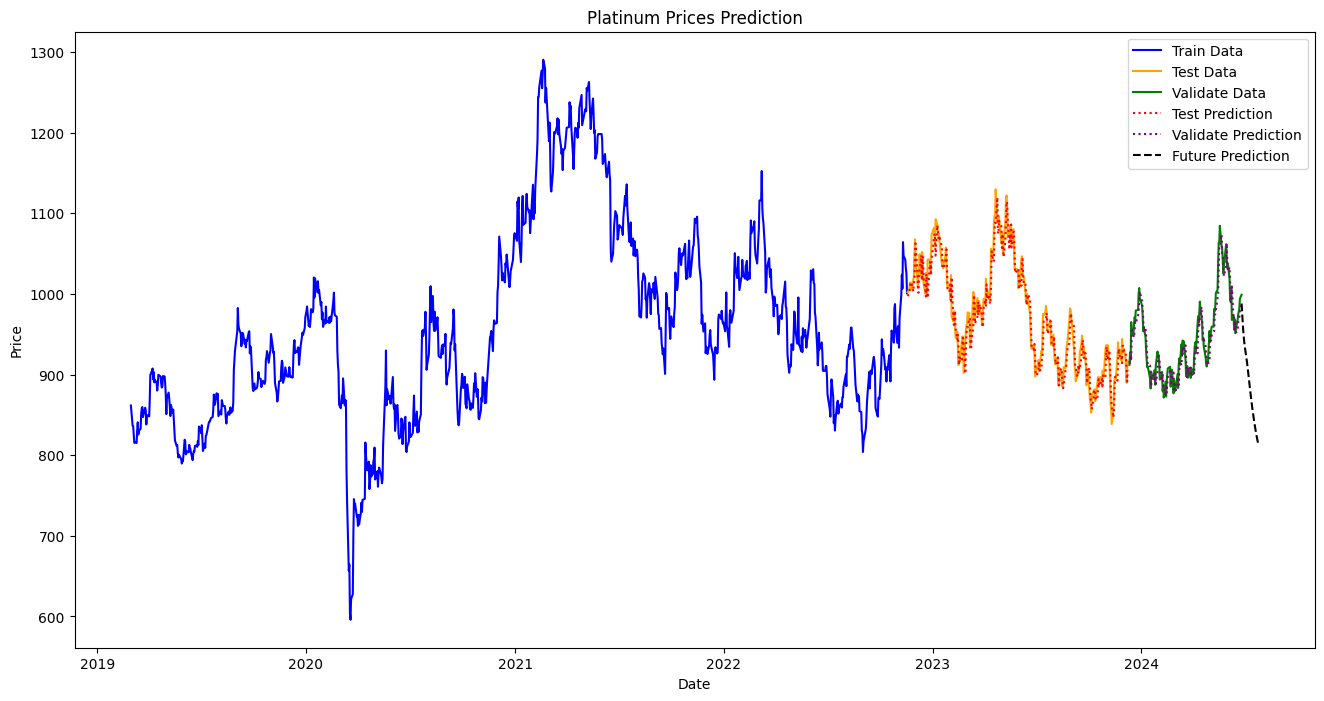

In [22]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 297.8875835048976
Lower Bound of Future Prediction: [[ 714.51131422]
 [ 725.73870846]
 [ 738.11043606]
 [ 750.78663185]
 [ 763.84704638]
 [ 777.43855151]
 [ 791.70226345]
 [ 806.73698014]
 [ 822.57284612]
 [ 839.17118692]
 [ 856.44334943]
 [ 874.27774086]
 [ 892.56289263]
 [ 911.2026983 ]
 [ 930.11827688]
 [ 949.24296254]
 [ 968.51265673]
 [ 987.85812635]
 [1007.20247798]
 [1026.46235862]
 [1045.5555333 ]
 [1064.40589531]
 [1082.94926328]
 [1101.13387801]
 [1118.92056818]
 [1136.27778137]
 [1153.18001068]
 [1169.60497893]
 [1185.53347314]
 [1200.94917879]]
Upper Bound of Future Prediction: [[1310.28648123]
 [1321.51387547]
 [1333.88560306]
 [1346.56179886]
 [1359.62221339]
 [1373.21371852]
 [1387.47743046]
 [1402.51214715]
 [1418.34801313]
 [1434.94635393]
 [1452.21851644]
 [1470.05290787]
 [1488.33805964]
 [1506.97786531]
 [1525.89344389]
 [1545.01812955]
 [1564.28782374]
 [1583.63329336]
 [1602.97764499]
 [1622.23752563]
 [1641.33070031]
 [1660.18106232]
 [1678.72443

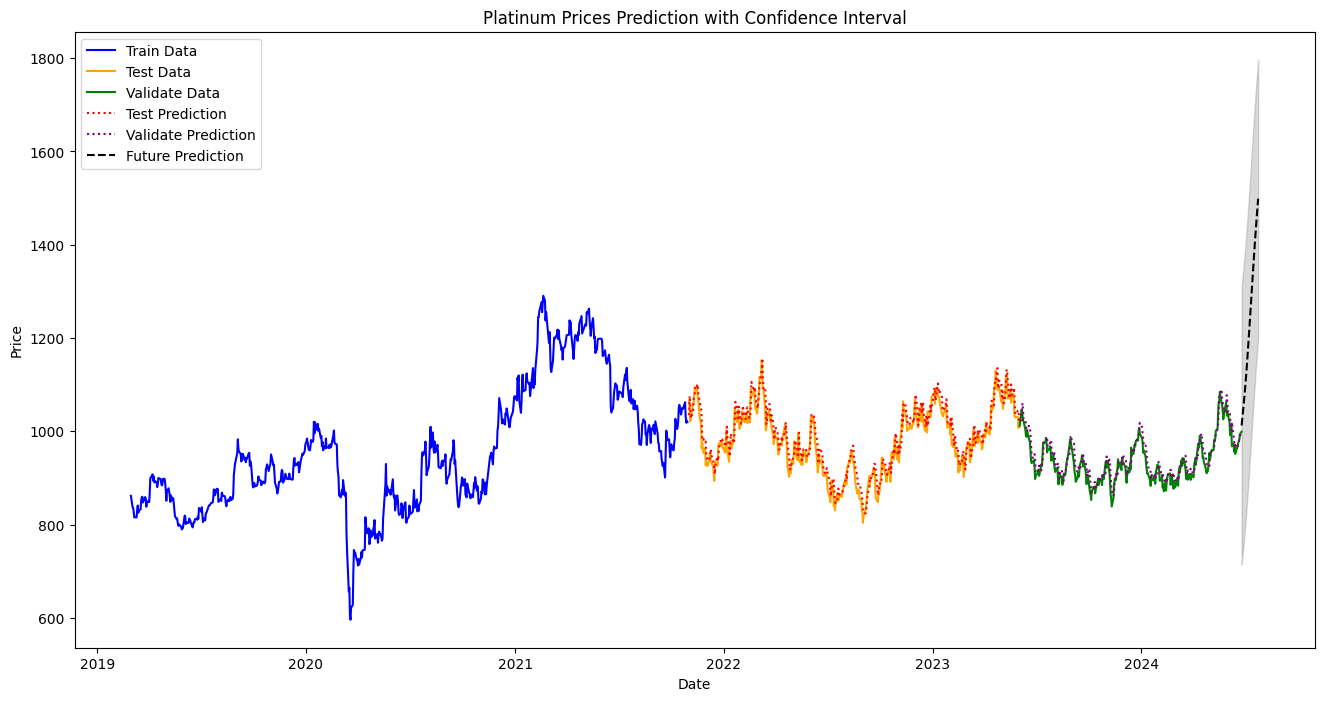

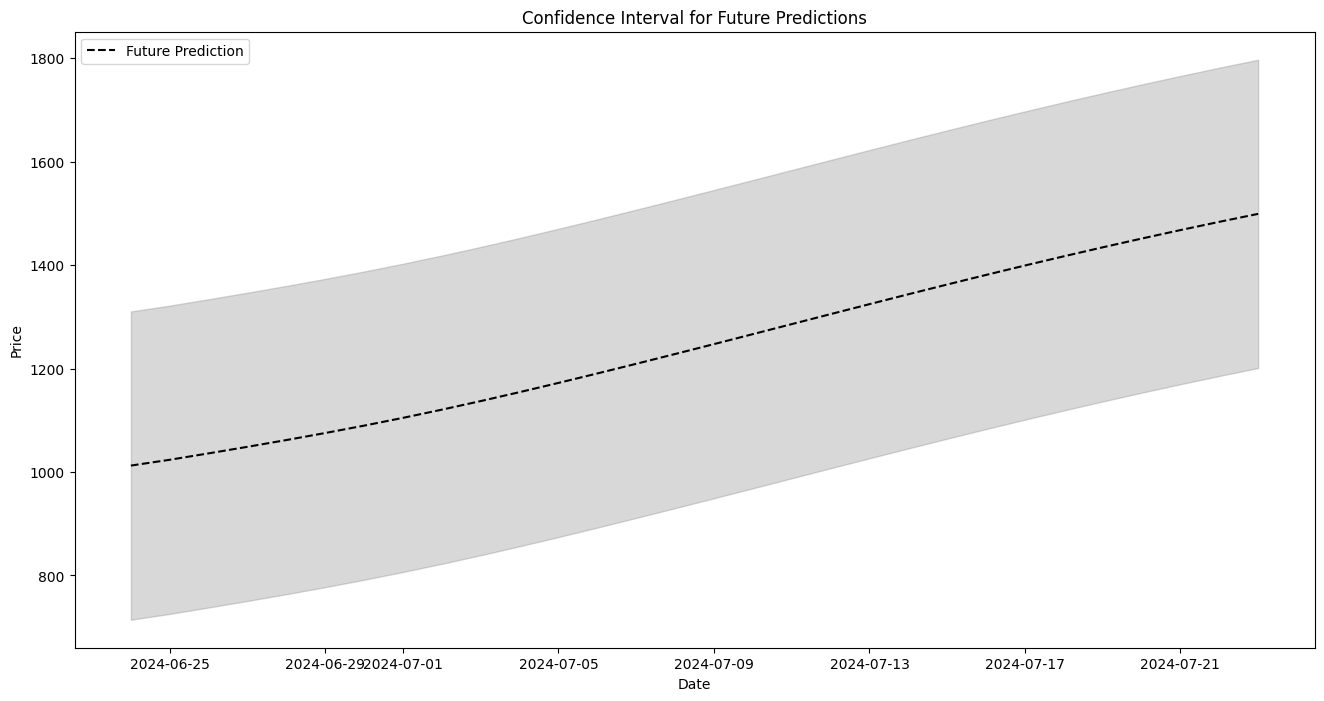

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [24]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.74504578788324
MAPE:  1.4089394971942708
RMSE:  17.236368277446537

** Validate **
MAE:  12.75351043245687
MAPE:  1.341938302900869
RMSE:  15.521839320271758


In [25]:
# Split dataset 6-3-1

In [26]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [27]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [28]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.19495, saving model to save_model_6_3_1.keras
14/14 - 3s - 196ms/step - loss: 0.1949
Epoch 2/80

Epoch 2: loss improved from 0.19495 to 0.08173, saving model to save_model_6_3_1.keras
14/14 - 1s - 45ms/step - loss: 0.0817
Epoch 3/80

Epoch 3: loss improved from 0.08173 to 0.06967, saving model to save_model_6_3_1.keras
14/14 - 1s - 45ms/step - loss: 0.0697
Epoch 4/80

Epoch 4: loss improved from 0.06967 to 0.06081, saving model to save_model_6_3_1.keras
14/14 - 1s - 45ms/step - loss: 0.0608
Epoch 5/80

Epoch 5: loss improved from 0.06081 to 0.05828, saving model to save_model_6_3_1.keras
14/14 - 1s - 46ms/step - loss: 0.0583
Epoch 6/80

Epoch 6: loss improved from 0.05828 to 0.05417, saving model to save_model_6_3_1.keras
14/14 - 1s - 45ms/step - loss: 0.0542
Epoch 7/80

Epoch 7: loss improved from 0.05417 to 0.05239, saving model to save_model_6_3_1.keras
14/14 - 1s - 45ms/step - loss: 0.0524
Epoch 8/80

Epoch 8: loss improved from 0.05239 to 0.05

In [30]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [31]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

11/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [32]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [33]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [34]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5601177215576172], [0.5420916676521301], [0.5247534513473511], [0.5107340216636658], [0.4999220669269562], [0.4915013313293457], [0.48440709710121155], [0.47766441106796265], [0.4705803096294403], [0.4628032445907593], [0.4542885422706604], [0.44521021842956543], [0.4358576238155365], [0.4265441298484802], [0.4175413250923157], [0.4090437591075897], [0.40116119384765625], [0.39392977952957153], [0.3873325288295746], [0.3813227415084839], [0.37584245204925537], [0.3708368241786957], [0.36626023054122925], [0.362077921628952], [0.358265221118927], [0.35480257868766785], [0.35167261958122253], [0.3488573133945465], [0.3463360667228699], [0.34408530592918396]]


In [35]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [36]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[985.01377823]
 [972.49107946]
 [960.44622144]
 [950.70692433]
 [943.1958599 ]
 [937.34597529]
 [932.41761112]
 [927.73346746]
 [922.81214254]
 [917.40941583]
 [911.49425255]
 [905.18754142]
 [898.6902944 ]
 [892.22021059]
 [885.96596257]
 [880.06270389]
 [874.58668619]
 [869.56302302]
 [864.97991328]
 [860.80491432]
 [856.9977575 ]
 [853.52034806]
 [850.34098869]
 [847.43553889]
 [844.78685603]
 [842.3813585 ]
 [840.20697607]
 [838.251183  ]
 [836.49967306]
 [834.93606964]]


In [37]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

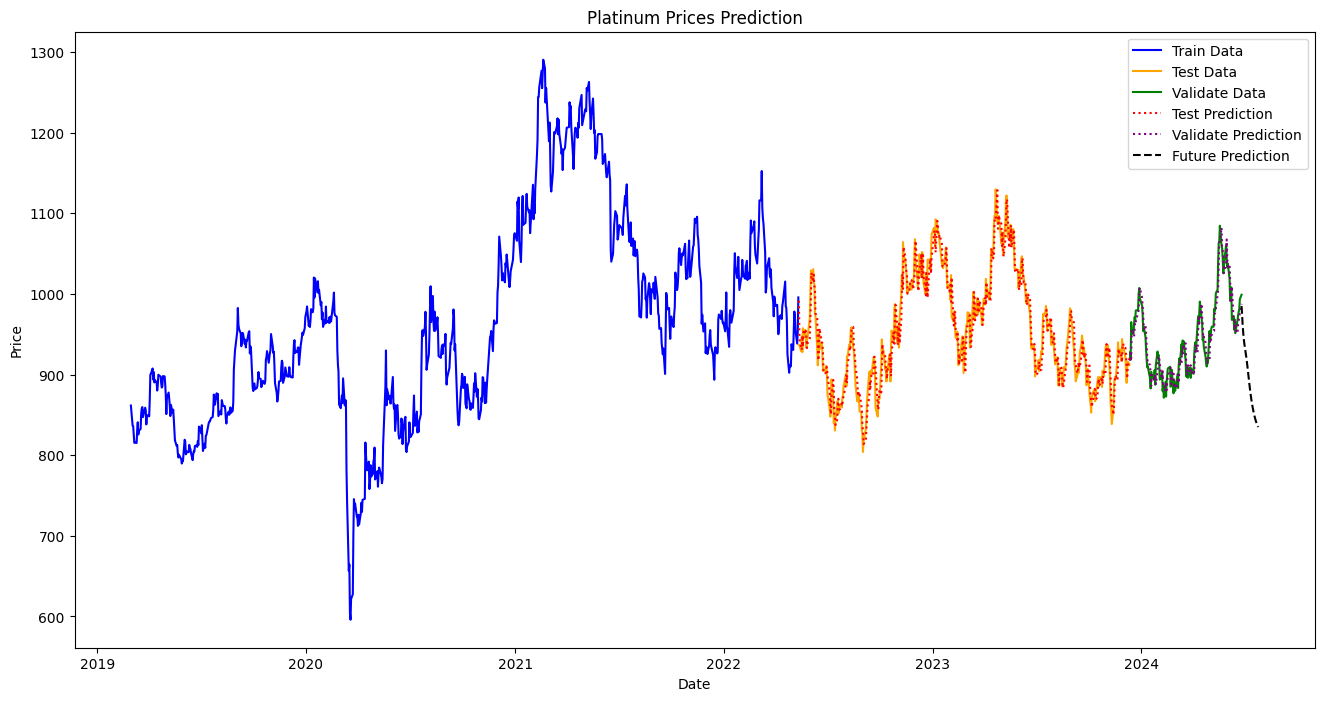

In [38]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


Margin of Error: 297.8875835048976
Lower Bound of Future Prediction: [[ 714.51131422]
 [ 725.73870846]
 [ 738.11043606]
 [ 750.78663185]
 [ 763.84704638]
 [ 777.43855151]
 [ 791.70226345]
 [ 806.73698014]
 [ 822.57284612]
 [ 839.17118692]
 [ 856.44334943]
 [ 874.27774086]
 [ 892.56289263]
 [ 911.2026983 ]
 [ 930.11827688]
 [ 949.24296254]
 [ 968.51265673]
 [ 987.85812635]
 [1007.20247798]
 [1026.46235862]
 [1045.5555333 ]
 [1064.40589531]
 [1082.94926328]
 [1101.13387801]
 [1118.92056818]
 [1136.27778137]
 [1153.18001068]
 [1169.60497893]
 [1185.53347314]
 [1200.94917879]]
Upper Bound of Future Prediction: [[1310.28648123]
 [1321.51387547]
 [1333.88560306]
 [1346.56179886]
 [1359.62221339]
 [1373.21371852]
 [1387.47743046]
 [1402.51214715]
 [1418.34801313]
 [1434.94635393]
 [1452.21851644]
 [1470.05290787]
 [1488.33805964]
 [1506.97786531]
 [1525.89344389]
 [1545.01812955]
 [1564.28782374]
 [1583.63329336]
 [1602.97764499]
 [1622.23752563]
 [1641.33070031]
 [1660.18106232]
 [1678.72443

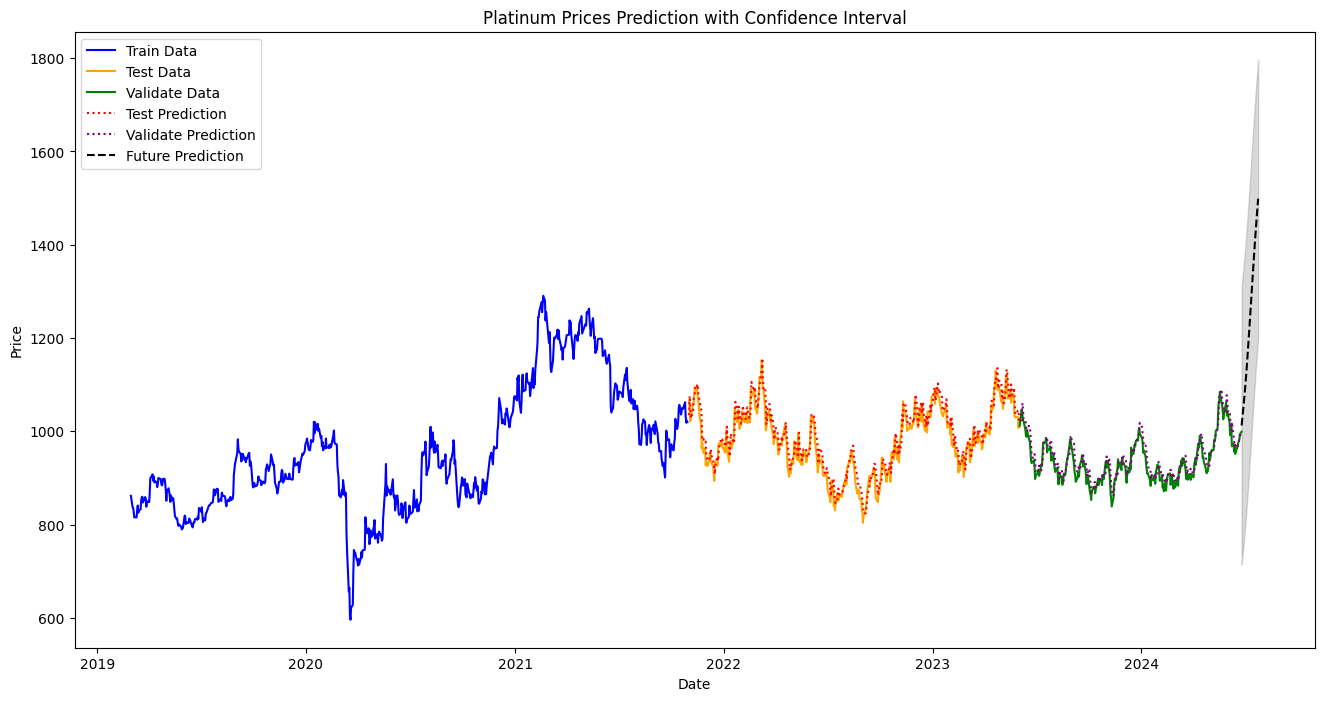

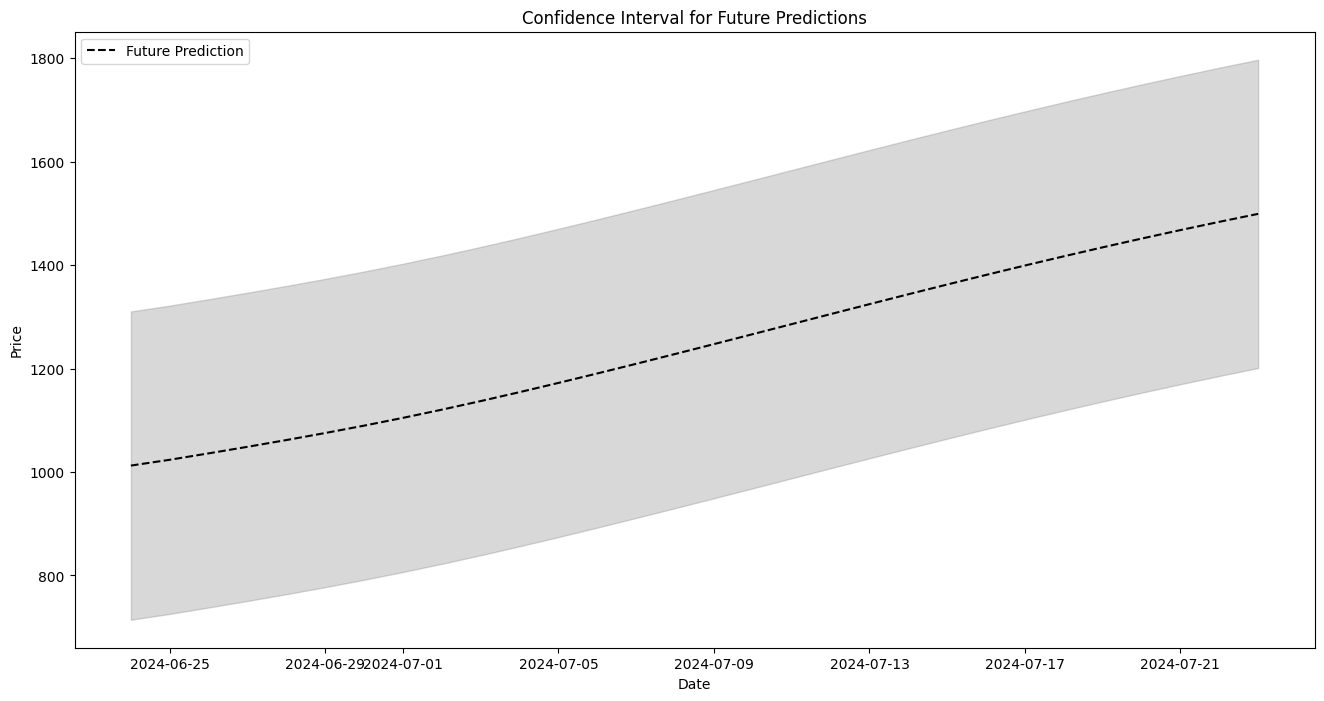

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [40]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.37813456933102
MAPE:  1.5088532465344549
RMSE:  18.034196420879148

** Validate **
MAE:  12.81421127892976
MAPE:  1.3507736316782244
RMSE:  15.517040813627426


In [41]:
# Split dataset 5-3-2 

In [42]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)# Split data



train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [43]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [44]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [45]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.28351, saving model to save_model_5_3_2.keras
12/12 - 3s - 234ms/step - loss: 0.2835
Epoch 2/80

Epoch 2: loss improved from 0.28351 to 0.10060, saving model to save_model_5_3_2.keras
12/12 - 1s - 44ms/step - loss: 0.1006
Epoch 3/80

Epoch 3: loss improved from 0.10060 to 0.07458, saving model to save_model_5_3_2.keras
12/12 - 1s - 44ms/step - loss: 0.0746
Epoch 4/80

Epoch 4: loss improved from 0.07458 to 0.06255, saving model to save_model_5_3_2.keras
12/12 - 1s - 44ms/step - loss: 0.0625
Epoch 5/80

Epoch 5: loss improved from 0.06255 to 0.05654, saving model to save_model_5_3_2.keras
12/12 - 1s - 44ms/step - loss: 0.0565
Epoch 6/80

Epoch 6: loss did not improve from 0.05654
12/12 - 1s - 42ms/step - loss: 0.0577
Epoch 7/80

Epoch 7: loss improved from 0.05654 to 0.05233, saving model to save_model_5_3_2.keras
12/12 - 1s - 44ms/step - loss: 0.0523
Epoch 8/80

Epoch 8: loss improved from 0.05233 to 0.05006, saving model to save_model_5_3_2.keras


In [46]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [47]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [48]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [49]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [50]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5995377898216248], [0.615699291229248], [0.633508026599884], [0.6517550349235535], [0.6705551147460938], [0.6901196837425232], [0.7106518745422363], [0.7322939038276672], [0.7550891637802124], [0.7789819836616516], [0.8038447499275208], [0.8295168280601501], [0.8558377623558044], [0.88266921043396], [0.9098976254463196], [0.9374270439147949], [0.9651651978492737], [0.9930124282836914], [1.0208580493927002], [1.0485820770263672], [1.0760661363601685], [1.1032006740570068], [1.1298933029174805], [1.1560695171356201], [1.1816729307174683], [1.206658124923706], [1.2309883832931519], [1.2546316385269165], [1.2775602340698242], [1.2997506856918335]]


In [51]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [52]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1012.39889773]
 [1023.62629197]
 [1035.99801956]
 [1048.67421535]
 [1061.73462989]
 [1075.32613501]
 [1089.58984696]
 [1104.62456365]
 [1120.46042962]
 [1137.05877043]
 [1154.33093294]
 [1172.16532436]
 [1190.45047613]
 [1209.0902818 ]
 [1228.00586038]
 [1247.13054605]
 [1266.40024023]
 [1285.74570986]
 [1305.09006148]
 [1324.34994212]
 [1343.4431168 ]
 [1362.29347881]
 [1380.83684678]
 [1399.02146152]
 [1416.80815168]
 [1434.16536488]
 [1451.06759418]
 [1467.49256244]
 [1483.42105664]
 [1498.8367623 ]]


In [53]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler(feature_range=(0, 1))
sc.fit(df1[['close']])  

MinMaxScaler()

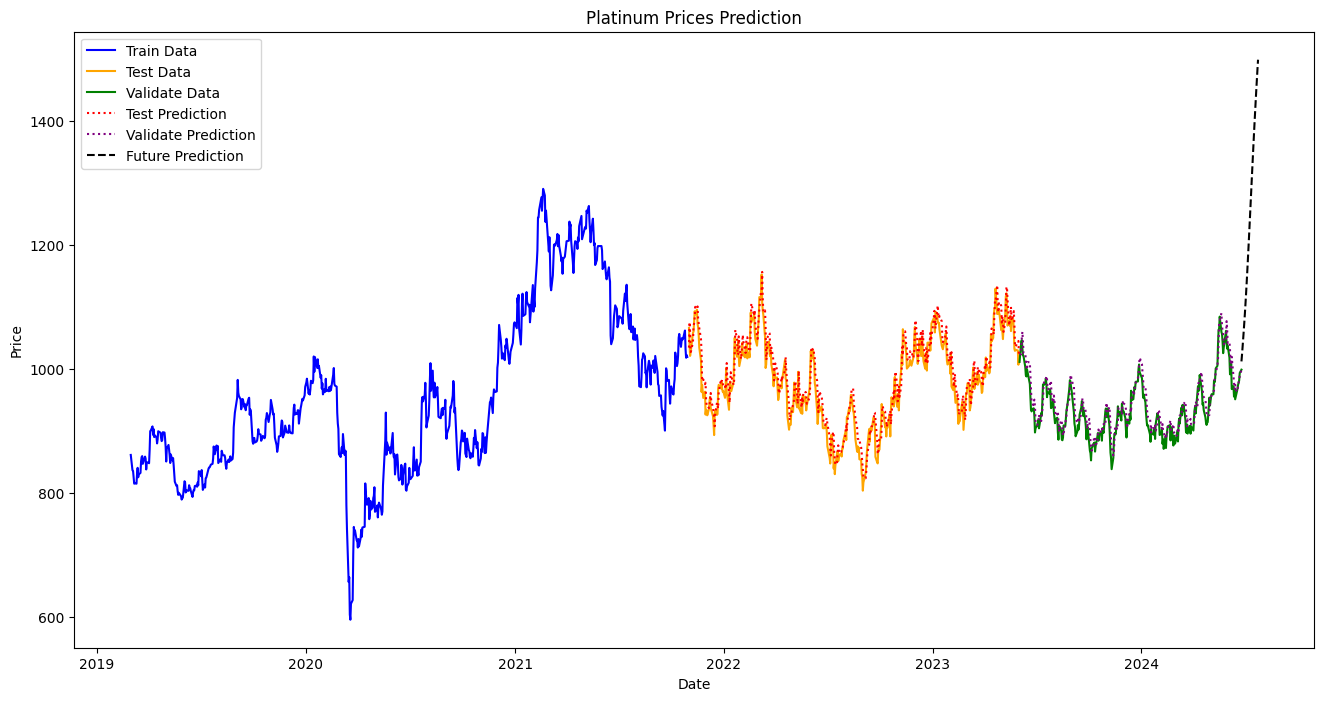

In [54]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

Margin of Error: 297.8875835048976
Lower Bound of Future Prediction: [[ 714.51131422]
 [ 725.73870846]
 [ 738.11043606]
 [ 750.78663185]
 [ 763.84704638]
 [ 777.43855151]
 [ 791.70226345]
 [ 806.73698014]
 [ 822.57284612]
 [ 839.17118692]
 [ 856.44334943]
 [ 874.27774086]
 [ 892.56289263]
 [ 911.2026983 ]
 [ 930.11827688]
 [ 949.24296254]
 [ 968.51265673]
 [ 987.85812635]
 [1007.20247798]
 [1026.46235862]
 [1045.5555333 ]
 [1064.40589531]
 [1082.94926328]
 [1101.13387801]
 [1118.92056818]
 [1136.27778137]
 [1153.18001068]
 [1169.60497893]
 [1185.53347314]
 [1200.94917879]]
Upper Bound of Future Prediction: [[1310.28648123]
 [1321.51387547]
 [1333.88560306]
 [1346.56179886]
 [1359.62221339]
 [1373.21371852]
 [1387.47743046]
 [1402.51214715]
 [1418.34801313]
 [1434.94635393]
 [1452.21851644]
 [1470.05290787]
 [1488.33805964]
 [1506.97786531]
 [1525.89344389]
 [1545.01812955]
 [1564.28782374]
 [1583.63329336]
 [1602.97764499]
 [1622.23752563]
 [1641.33070031]
 [1660.18106232]
 [1678.72443

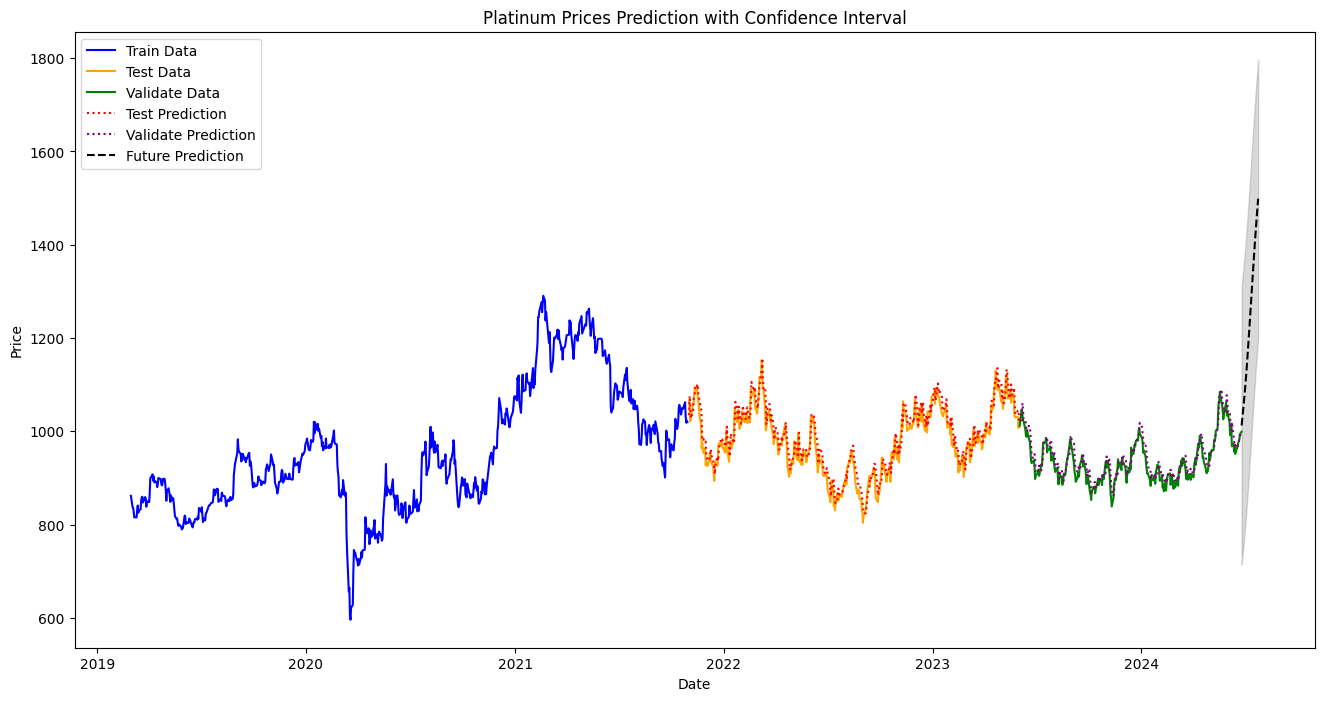

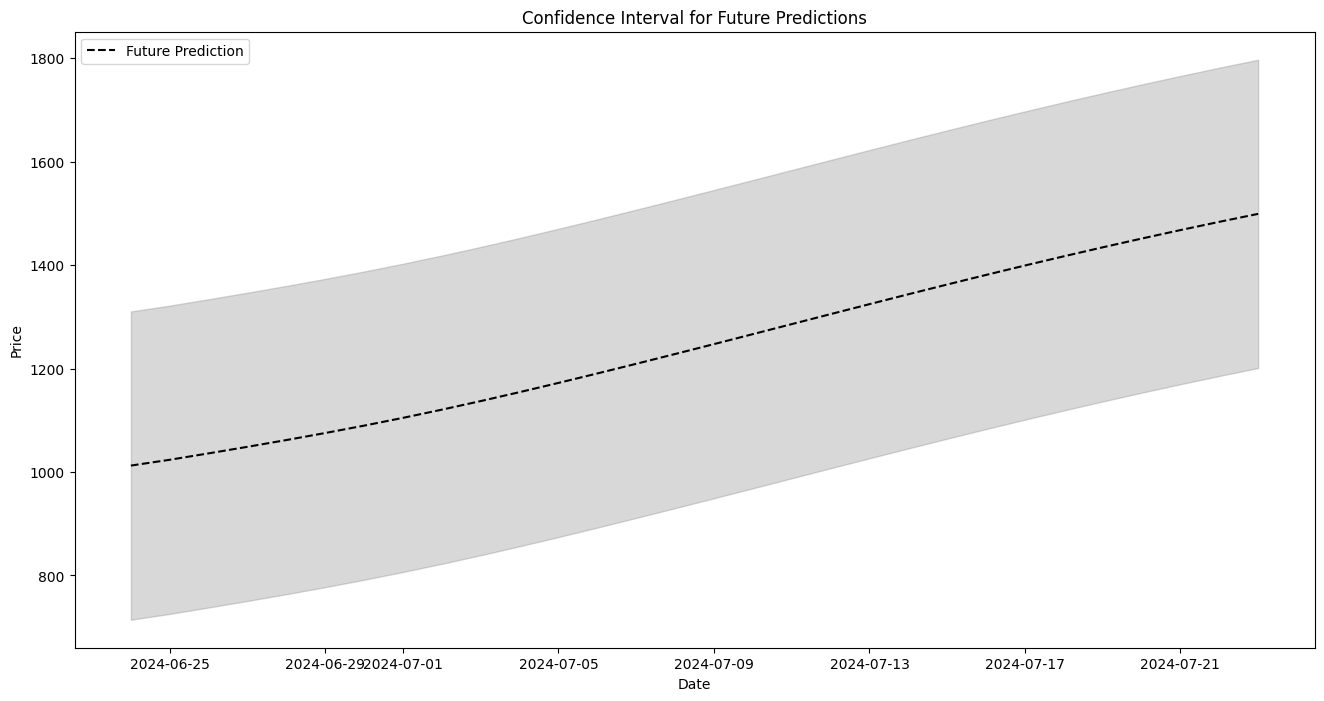

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#   Create a confidence interval for the prediction
confidence_level = 0.95
z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for 95% confidence level

# Create error range for Future Prediction
std_dev = np.std(y_pred_future)  # Standard deviation of future prediction
margin_of_error = z_score * std_dev

# Calculate the confidence interval for Future Prediction
lower_bound = y_pred_future - margin_of_error
upper_bound = y_pred_future + margin_of_error

# Print out the confidence interval value
print("Margin of Error:", margin_of_error)
print("Lower Bound of Future Prediction:", lower_bound)
print("Upper Bound of Future Prediction:", upper_bound)

# Calculate the reliability of the model
mean_prediction = np.mean(y_pred_future)
confidence_interval_range = upper_bound - lower_bound
confidence_score = 1 - (np.mean(confidence_interval_range) / mean_prediction)
print("Confidence Score:", confidence_score)

# Function to calculate confidence interval
def calculate_confidence_interval(predictions, confidence_level=0.95):
    z_score = norm.ppf((1 + confidence_level) / 2)  # Z value for confidence level
    std_dev = np.std(predictions)  # Standard deviation of prediction
    margin_of_error = z_score * std_dev
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    return lower_bound, upper_bound, margin_of_error

#   Use the function to calculate the confidence interval for Future Prediction
lower_bound, upper_bound, margin_of_error = calculate_confidence_interval(y_pred_future)

# Convert confidence intervals to DataFrames for plotting convenience
PREDICTIONS_FUTURE_LOWER = pd.DataFrame(lower_bound, columns=['close']).set_index(pd.Series(datelist_future))
PREDICTIONS_FUTURE_UPPER = pd.DataFrame(upper_bound, columns=['close']).set_index(pd.Series(datelist_future))

# Plot a graph with confidence intervals
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction with Confidence Interval')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()

#Draw a separate graph for the confidence interval
plt.figure(figsize=(16, 8))

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['close'], color='black', linestyle='dashed', label='Future Prediction')

# Plot the confidence interval for future predictions
plt.fill_between(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE_LOWER['close'], PREDICTIONS_FUTURE_UPPER['close'], color='gray', alpha=0.3, label='Confidence Interval (95%)')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Confidence Interval for Future Predictions')
plt.legend(handles=[pf])
plt.show()


In [56]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  18.208563569802145
MAPE:  1.872405627548745
RMSE:  22.474893951214344

** Validate **
MAE:  14.898422355938678
MAPE:  1.6016810263852859
RMSE:  18.476948773479112


In [57]:
import pandas as pd

data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [14.4476, 17.6834, 20.2988],
    "Testing MAPE": [1.4876, 1.8642, 2.0794],
    "Testing RMSE": [18.1176, 21.7575, 24.8895],
    "Validation MAE": [12.9100, 15.2484, 16.3783],
    "Validation MAPE": [1.3688, 1.6192, 1.7569],
    "Validation RMSE": [16.0406, 19.1244, 20.2222],
}

df = pd.DataFrame(data)

print(df.to_string(index=False))


Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1      14.4476        1.4876       18.1176         12.9100           1.3688          16.0406
 LSTM 6-3-1      17.6834        1.8642       21.7575         15.2484           1.6192          19.1244
 LSTM 5-3-2      20.2988        2.0794       24.8895         16.3783           1.7569          20.2222
